In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
#from sklearn.preprocessing import StandardScaler

In [2]:
#import data
bhbh = pd.read_csv('BHBH.csv')

#adding q and mass_max_out
bhbh['Mass_max_out'] = bhbh.apply(lambda x: x['Mass_0_out'] if (x['Mass_1_out'] > x['Mass_0_out']) else x['Mass_1_out'], axis=1)
bhbh['q'] = bhbh.apply(lambda x: x['Mass_0_out']/x['Mass_1_out'] if (x['Mass_1_out'] > x['Mass_0_out']) else x['Mass_1_out']/x['Mass_0_out'], axis=1)

#fill na
bhbh.fillna(0)


,Unnamed: 0,name,Mass_0,Z_0,spin_0,SN_0,Tstart_0,Mass_1,Z_1,a,...,Mass_1_out,Semimajor,Eccentricity,GWtime,BWorldtime,RLO,CE,tdelay,Mass_max_out,q
0,0,0_892687128228499,34.044,0.0001,0.0,rapid_gauNS,zams,26.514,0.0001,1850.0,...,10.136270,2132.70200,0.415168,1.063429e+11,6.826057,0.0,2.0,1.063429e+11,10.136270,0.302760
1,1,0_853530625884132,72.066,0.0001,0.0,rapid_gauNS,zams,27.308,0.0001,2980.0,...,6.408674,77.27157,0.080601,5.383296e+05,6.673187,1.0,1.0,5.383363e+05,6.408674,0.178708
2,2,0_663761388951870,45.129,0.0001,0.0,rapid_gauNS,zams,43.875,0.0001,8900.0,...,43.256140,7898.29400,0.869922,2.696385e+10,4.636688,0.0,0.0,2.696385e+10,43.256140,0.972002
3,3,0_288577009013924,91.090,0.0001,0.0,rapid_gauNS,zams,53.664,0.0001,7730.0,...,53.322640,4714.46200,0.550149,1.109533e+11,4.094508,1.0,0.0,1.109533e+11,38.066680,0.713893
4,4,0_736350695048425,53.827,0.0001,0.0,rapid_gauNS,zams,38.009,0.0001,15200.0,...,37.424980,15418.48000,0.019973,4.710726e+13,5.119633,0.0,0.0,4.710726e+13,37.424980,0.704693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81888,331,0_133330331314376,24.346,0.0100,0.0,rapid_gauNS,zams,24.215,0.0100,7570.0,...,20.050940,8835.09600,0.056804,5.588582e+13,7.316824,0.0,0.0,5.588582e+13,20.050940,0.997413
81889,332,0_386148050098142,119.702,0.0100,0.0,rapid_gauNS,zams,84.740,0.0100,81600.0,...,34.333730,210494.70000,0.313823,1.901373e+18,3.272379,0.0,0.0,1.901373e+18,34.333730,0.834571
81890,333,0_272337824410863,56.315,0.0100,0.0,rapid_gauNS,zams,34.050,0.0100,11500.0,...,22.512770,21379.82000,0.599604,2.610532e+14,5.458789,0.0,0.0,2.610532e+14,22.512770,0.945711
81891,334,0_862589532557700,104.790,0.0100,0.0,rapid_gauNS,zams,44.480,0.0100,93300.0,...,20.186010,230758.40000,0.640039,1.457729e+18,4.544498,0.0,0.0,1.457729e+18,20.186010,0.524713


In [3]:
#add column label
n_bins = 50

# Same labels as yours
labels = [str(x) for x in range(n_bins)]
print('labels:', labels)

# Define the edges between bins
_ , bin_edges = np.histogram(bhbh.q.values, bins=n_bins, range=(0.0,1.0))

# pd.cut each column, with each bin closed on left and open on right
bhbh['labels'] = pd.cut(bhbh['q'].values, bins=bin_edges, right=False, labels=False)

bhbh.head()

print('bin_edges:', len(bin_edges))

bhbh.head()

labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']
bin_edges: 51


,Unnamed: 0,name,Mass_0,Z_0,spin_0,SN_0,Tstart_0,Mass_1,Z_1,a,...,Semimajor,Eccentricity,GWtime,BWorldtime,RLO,CE,tdelay,Mass_max_out,q,labels
0,0,0_892687128228499,34.044,0.0001,0.0,rapid_gauNS,zams,26.514,0.0001,1850.0,...,2132.70200,0.415168,1.063429e+11,6.826057,NaN,2.0,1.063429e+11,10.136270,0.302760,15
1,1,0_853530625884132,72.066,0.0001,0.0,rapid_gauNS,zams,27.308,0.0001,2980.0,...,77.27157,0.080601,5.383296e+05,6.673187,1.0,1.0,5.383363e+05,6.408674,0.178708,8
2,2,0_663761388951870,45.129,0.0001,0.0,rapid_gauNS,zams,43.875,0.0001,8900.0,...,7898.29400,0.869922,2.696385e+10,4.636688,NaN,NaN,2.696385e+10,43.256140,0.972002,48
3,3,0_288577009013924,91.090,0.0001,0.0,rapid_gauNS,zams,53.664,0.0001,7730.0,...,4714.46200,0.550149,1.109533e+11,4.094508,1.0,NaN,1.109533e+11,38.066680,0.713893,35
4,4,0_736350695048425,53.827,0.0001,0.0,rapid_gauNS,zams,38.009,0.0001,15200.0,...,15418.48000,0.019973,4.710726e+13,5.119633,NaN,NaN,4.710726e+13,37.424980,0.704693,35


## Dataset

In [4]:
class BHBHdatset(torch.utils.data.Dataset):
    def __init__(self, df, n_bins, input_cols, target_cols, scale_data=True):
        for i in input_cols:
            if i != 'Z_0':
                df[i] = (df[i] - df[i].mean())/df[i].std()
            
        self.X = torch.from_numpy(df[input_cols].values)
        
        #label one-hot encoding
        y = torch.from_numpy(df[target_cols].values)
        t = torch.zeros(len(self.X), n_bins)
        for k in range(len(t)):
            t[k, y[k].item()] = 1
        self.y = t
            
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]


## Dataloader

In [5]:
data = bhbh
dataset = BHBHdatset(data,
                     n_bins,
                     ['Mass_0','Z_0', 'Mass_1', 'a', 'e'],
                     ['labels'])
#trainloader
trainloader = torch.utils.data.DataLoader(dataset,
                                          batch_size=500,
                                          shuffle=True)

In [6]:
for i, x in enumerate(trainloader):
    if i < 10:
        print(i, x[1])

0 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
1 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
2 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
3 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 

## Network

In [7]:
class Net(nn.Module):
    def __init__(self, n_bins):
        
        super(Net, self).__init__()
        
        self.in1 = nn.Linear(5, 10)
        
        self.in2 = nn.Linear(10, 20)
        
        self.output = nn.Linear(20, n_bins)
        
    # x represents our data
    def forward(self, x):
        x = self.in1(x)
        x = torch.relu(x)
        x = self.in2(x)
        x = torch.relu(x)
        
        x = self.output(x)
        x = F.softmax(x)
        
        return x

## Training

In [8]:
device = "cuda" # device cardinal

net = Net(n_bins).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(net.parameters(), lr=1e-4)

In [9]:
# Define the latent CG dimension, feel free to set your own, it only needs to be smaller than the number of total atoms 

#Liste contenenti i valori delle loss per ogni epoca
loss_log = []

#Ciclo del training, 600 epoche
for epoch in range(50):

    loss_epoch = 0.0  

    #Ciclo sulle batch
    for i, t in enumerate(trainloader):
        
        # recenter xyz 
        x = t[0].to(device)
        y = t[1].to(device)

        # encode and decode coordinates 
        y_predicted = net(x.float())
        
        #loss
        loss = loss_function(y_predicted, y)

        #parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #losses update
        loss_epoch += loss.item()

    #losses normalization
    loss_epoch = loss_epoch/x.shape[0]

    #Vengono aggiunti i valori delle loss alle liste
    loss_log.append(loss_epoch)
    
    print(loss_epoch, loss.item())

/tmp/ipykernel_1761/917440999.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


1.632407443820672 3.9113996028900146
1.6321268785394178 3.9108474254608154
1.6318106766572131 3.909475326538086
1.6314466503133604 3.9089784622192383
1.6310229155853504 3.908259153366089
1.6305358300682242 3.9074525833129883
1.6299859658452391 3.9058284759521484
1.6293709951502677 3.903038263320923
1.6287040570916718 3.901787757873535
1.6280067215742349 3.9025139808654785
1.6272616701878362 3.8984463214874268
1.6264949172507717 3.8957035541534424
1.6257083027720756 3.8936831951141357
1.6249118354787657 3.8930721282958984
1.6240969219887227 3.89279842376709
1.6233027363551482 3.8892769813537598
1.6225095219891186 3.888462543487549
1.6217427593454454 3.8878438472747803
1.6210191122448172 3.8847849369049072
1.6203311023518026 3.882556676864624
1.619684128967557 3.8811709880828857
1.619096621908911 3.8851611614227295
1.6185634178666364 3.882096290588379
1.618100418085967 3.8779571056365967
1.6176919203071498 3.884565591812134
1.6173337622149906 3.8735709190368652
1.617032373224506 3.874625

In [10]:
net.eval()

Net(
  (in1): Linear(in_features=5, out_features=10, bias=True)
  (in2): Linear(in_features=10, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=50, bias=True)
)

In [18]:
print(dataset[1000][0], dataset[1000][1])

predict = net(dataset[1000][0].to(device).float())


tensor([-0.5723,  0.0100, -0.9468, -0.4954, -0.4563], dtype=torch.float64) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


/tmp/ipykernel_1761/917440999.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


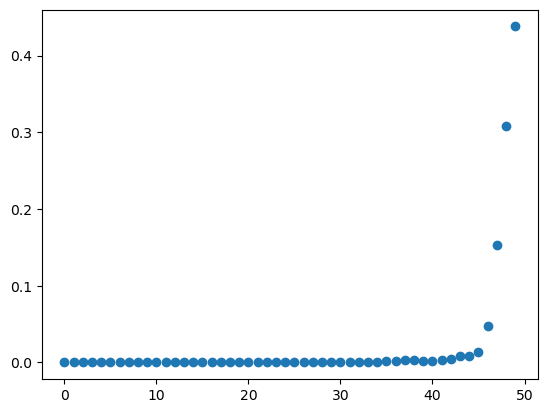

In [19]:
plt.scatter(np.arange(n_bins), predict.detach().cpu())